In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


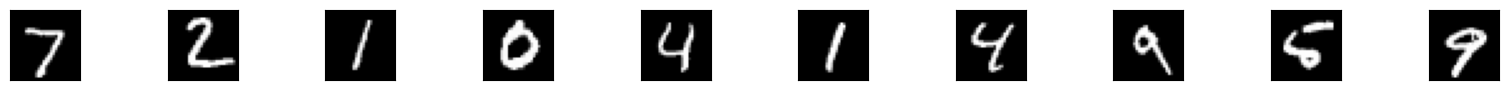

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many records we will display
plt.figure(figsize=(2 * n, 2))  # Adjusting figure size to accommodate multiple images
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))  # Reshape to (28, 28) for displaying
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


![image.png](attachment:image.png)

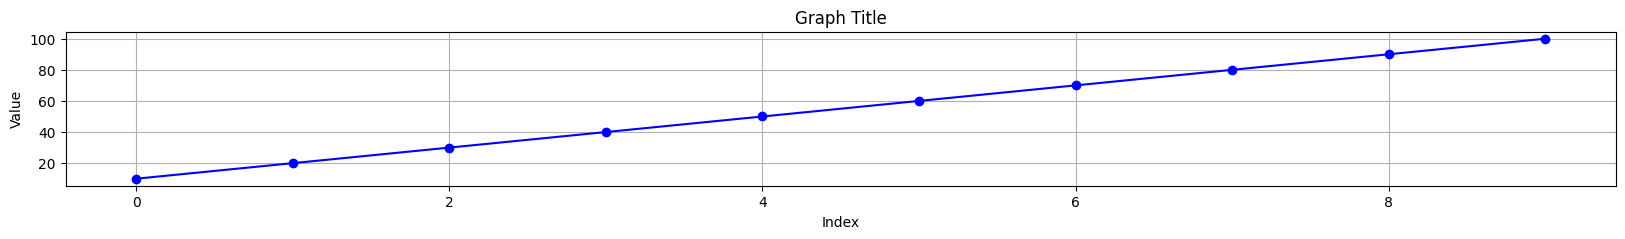

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming you have a list of values to plot, let's call it 'values'
values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.figure(figsize=(2 * n, 2))  # Adjusting figure size to accommodate multiple images
plt.plot(range(n), values, marker='o', color='b')  # Plotting the graph
plt.xlabel('Index')  # Label for x-axis
plt.ylabel('Value')  # Label for y-axis
plt.title('Graph Title')  # Title for the graph
plt.grid(True)  # Enabling grid
plt.show()


In [5]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, UpSampling2D, Reshape

In [45]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

encode_model = Sequential()

############
# Encoding #
############

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

## FLATTEN LAYER
encode_model.add(Flatten())

## DENSE LAYERS
encode_model.add(Dense(30, activation="relu"))  # Adjust the number of units as needed

In [46]:
encode_model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 392)               0         
                                                                 
 dense_28 (Dense)            (None, 30)              

In [50]:
# DeConv1
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

decode_model = Sequential()

decode_model.add(Dense(7*7*8, activation="relu"))
decode_model.add(Reshape([7,7,8]))

decode_model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same', ))
# Upsampling Layer
decode_model.add(UpSampling2D((2, 2)))

# DeConv2
decode_model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
# Upsampling Layer
decode_model.add(UpSampling2D((2, 2)))

# DeConv3
decode_model.add(Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same'))




In [51]:
autoencoder = Sequential([encode_model, decode_model])


In [52]:
encode_model.compile(optimizer='adadelta', loss='binary_crossentropy')


In [53]:
class Coder:
    def __init__(self):
        # Initialize any attributes here
        pass

    def summarize(self):
        # Define the summarize method behavior here
        print("Summarizing...")

# Instantiate an object of the Coder class
coder = Coder()

# Call the summarize method on the coder object
coder.summarize()


Summarizing...


In [54]:
encode_model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 392)               0         
                                                                 
 dense_28 (Dense)            (None, 30)              

In [55]:
decode_model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 392)               12152     
                                                                 
 reshape (Reshape)           (None, 7, 7, 8)           0         
                                                                 
 conv2d_61 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d_18 (UpSampli  (None, 14, 14, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_62 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 up_sampling2d_19 (UpSampli  (None, 28, 28, 16)        0         
 ng2D)                                               

In [56]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train / 255
print(x_train.shape)





(60000, 28, 28, 1)


In [57]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255
x_test.shape

(10000, 28, 28, 1)

In [58]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [59]:
# Train the model


autoencoder.fit(x=x_train, y=x_train, epochs=10, batch_size=128, shuffle=True, verbose=1, validation_data=(x_test, x_test))


Epoch 1/10
469/469 [==============================] - 66s 137ms/step - loss: 0.2214 - val_loss: 0.1376
Epoch 2/10
469/469 [==============================] - 67s 144ms/step - loss: 0.1279 - val_loss: 0.1186
Epoch 3/10
469/469 [==============================] - 77s 165ms/step - loss: 0.1169 - val_loss: 0.1120
Epoch 4/10
469/469 [==============================] - 64s 136ms/step - loss: 0.1118 - val_loss: 0.1086
Epoch 5/10
469/469 [==============================] - 60s 129ms/step - loss: 0.1086 - val_loss: 0.1054
Epoch 6/10
469/469 [==============================] - 62s 131ms/step - loss: 0.1064 - val_loss: 0.1042
Epoch 7/10
469/469 [==============================] - 61s 130ms/step - loss: 0.1047 - val_loss: 0.1020
Epoch 8/10
469/469 [==============================] - 63s 134ms/step - loss: 0.1034 - val_loss: 0.1012
Epoch 9/10
469/469 [==============================] - 60s 127ms/step - loss: 0.1023 - val_loss: 0.1001
Epoch 10/10
469/469 [==============================] - 61s 130ms/step - l

313/313 [==============================] - 3s 10ms/step


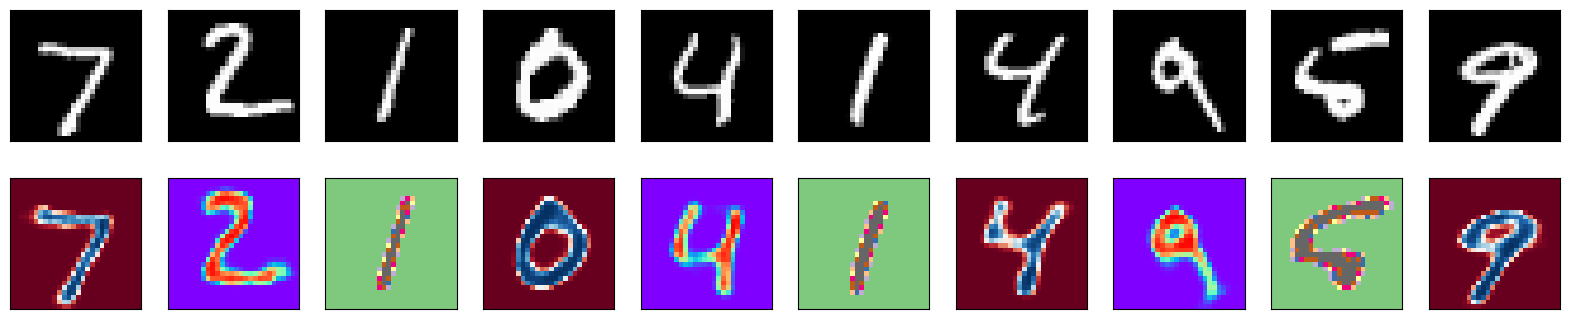

In [60]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):  # Specify the number of iterations
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Reshape the image correctly and set cmap to gray
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    if i % 3 == 0:
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='Greens') 
    elif i % 3 == 1:
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='OrRd')   
    else:
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='Dark2')    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


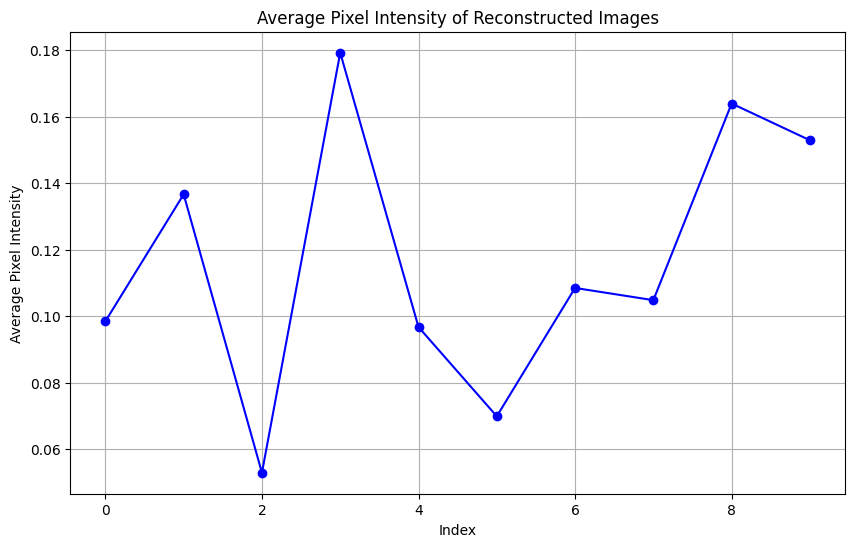

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the average pixel intensity across the reconstructed images for each index i
avg_intensity = [np.mean(decoded_imgs[i]) for i in range(n)]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(range(n), avg_intensity, marker='o', color='b')  # Plotting the graph
plt.xlabel('Index')  # Label for x-axis
plt.ylabel('Average Pixel Intensity')  # Label for y-axis
plt.title('Average Pixel Intensity of Reconstructed Images')  # Title for the graph
plt.grid(True)  # Enabling grid
plt.show()
